Image shape: (598, 282)
Image dtype: float32


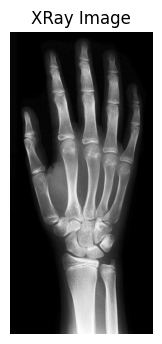

In [ ]:
import numpy as np # Basic interface in Python to N-dimensional arrays
from PIL import Image # Tool to load basic 2-D images
import matplotlib.pyplot as plt # Basic visualization for 1-D plots and 2-D images / data
import scipy.ndimage as nd # Useful functions to process N-dimensional arrays
# (e.g. morpohology operations for N-D images)
%matplotlib inline
# Jupyter specific command to directly show the visualizations

image = Image.open("xray.jpg")
image = np.array(image) # Convert the image to NumPy array
image = image.astype(np.float32)
image = (image - np.min(image)) / (np.max(image)- np.min(image))
image = image [:, :, 0]
print(f"Image shape: {image.shape}") 
print(f"Image dtype: {image.dtype}")

plt.figure(dpi=100)
plt.imshow(image, cmap='gray') # Show the image in grayscale
plt.axis('off') # Turn off the axis
plt.title("XRay Image")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

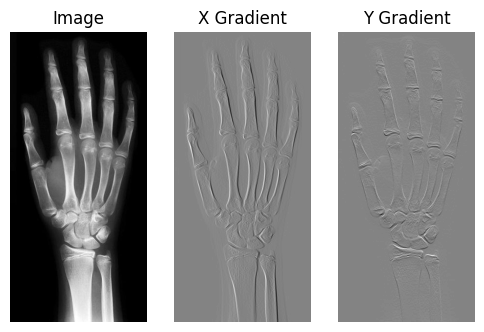

In [ ]:
row_gradient, col_gradient = np.gradient(image) # TODO - use the np.gradient function to calculate the gradient

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

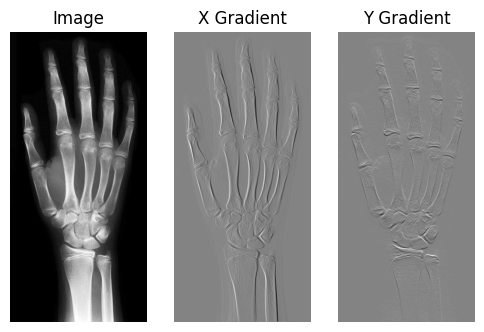

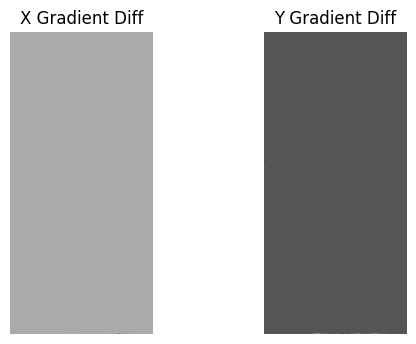

In [ ]:
def our_gradient(image):
  x_len = image.shape[0]
  y_len = image.shape[1]

  row_gradient = np.zeros_like(image)
  col_gradient = np.zeros_like(image)

  for x in range(1, image.shape[1]-1):
    for y in range(1, image.shape[0]-1):
      row_gradient[y,x] = (image[y+1,x]-image[y-1,x]) / 2
      col_gradient[y,x] = (image[y,x+1]-image[y,x-1]) / 2

  for x in range(0,image.shape[1]):
    col_gradient[0,x] = image[1,x]-image[0,x]
    col_gradient[-1,x] = image[-1,x]-image[-2,x]
  
  for y in range(0,image.shape[0]):
    row_gradient[y,0] = image[y,1]-image[y,0]
    row_gradient[y,-1] = image[y,-1]-image[y,-2]

  return row_gradient, col_gradient

our_row_gradient, our_col_gradient = our_gradient(image)

# Again show the results - this time using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(our_col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(our_row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

# Show difference images

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(col_gradient-our_col_gradient, cmap='gray') # TODO
plt.axis('off')
plt.title("X Gradient Diff")
plt.subplot(1, 2, 2)
plt.imshow(row_gradient-our_row_gradient, cmap='gray') # TODO
plt.axis('off')
plt.title("Y Gradient Diff")
plt.show()

In [ ]:
mse = lambda a, b: None # TODO - implement the mean squared error as lambda expression

def mse(gradient, our_gradient):
  return np.square(np.subtract(gradient, our_gradient)).mean()

print(f"MSE between row gradients: {mse(row_gradient, our_row_gradient)}")
print(f"MSE between column gradients: {mse(col_gradient, our_col_gradient)}")

MSE between row gradients: 6.310668965170407e-08
MSE between column gradients: 1.5292430362023879e-06


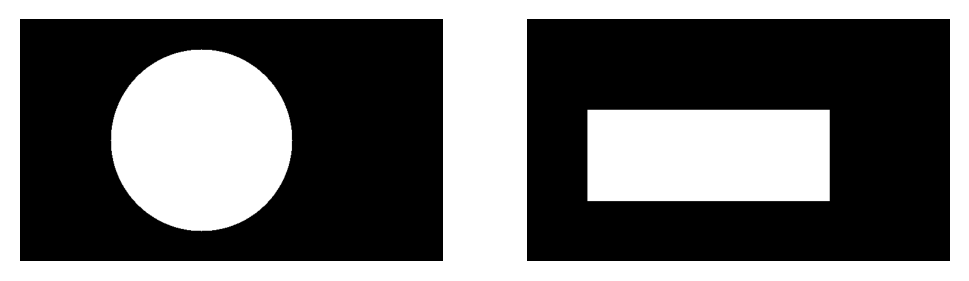

In [ ]:
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
  circle = np.zeros((y_size, x_size))

  for x in range(0, x_size):
    for y in range(0, y_size):
      if (x-x_origin)**2 + (y-y_origin)**2 <= radius**2:
        circle[y,x] = 1
      else:
        circle[y,x] = 0
  return circle

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
  rectangle = np.zeros((y_size, x_size))
 
  for x in range(0, x_size):
    for y in range(0, y_size):
      if y >= y_b and y <= y_b+height and x >= x_b and x <= x_b+width:
        rectangle[y,x] = 1
      else:
        rectangle[y,x] = 0

  return rectangle

x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_ciricle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

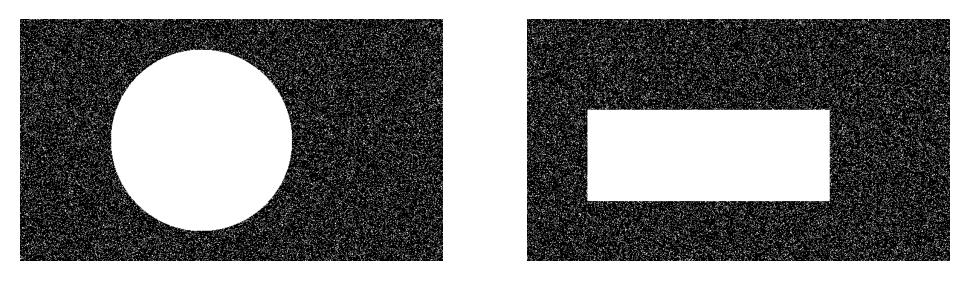

In [ ]:
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

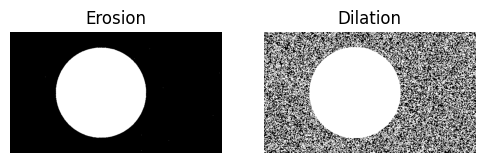

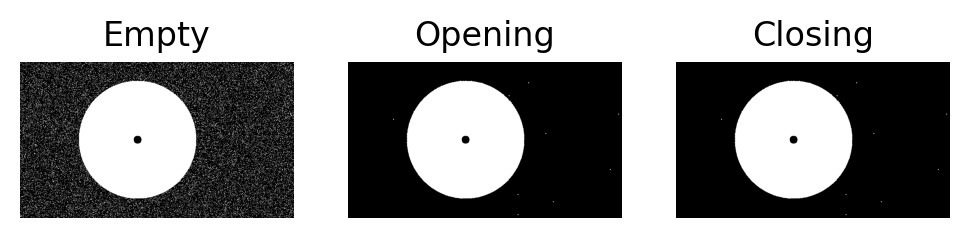

In [ ]:
eroded_circle = nd.binary_erosion(circle)
dilated_circle = nd.binary_dilation(circle)

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
opened_circle = nd.binary_opening(empty_circle)
closed_opened_circle = nd.binary_closing(opened_circle)

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

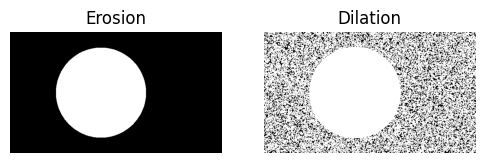

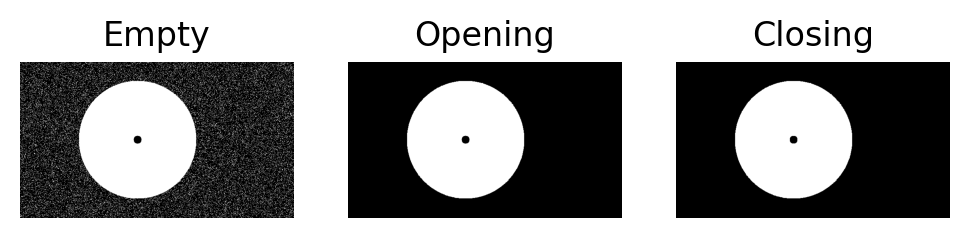

In [ ]:
def erosion(image, se):
  se = np.full((3, 3), True)
  eroded_image = np.zeros_like(image)

  for x in range(1, image.shape[1]-1):
    for y in range(1, image.shape[0]-1):
      sub_image = image[y-1:y+2,x-1:x+2]
      if sub_image.all() == se.all():
        eroded_image[y,x] = True
      else:
        eroded_image[y,x] = False
  
  return eroded_image

def dilation(image, se):
  se = np.full((3, 3), True)
  dilated_image = np.zeros_like(image)
  extended_image = np.full((image.shape[0]+2,image.shape[1]+2), False)

  extended_image[1:-1,1:-1] = image

  for x in range(1, extended_image.shape[1]-1):
    for y in range(1, extended_image.shape[0]-1):
      sub_image = extended_image[y-1:y+2,x-1:x+2]
      if sub_image.any() == se.any():
        dilated_image[y-1,x-1] = True
      else:
        dilated_image[y-1,x-1] = False
  
  return dilated_image

def opening(image, se):
  eroded_image = erosion(image, None)
  opened_image = dilation(eroded_image, None)

  return opened_image

def closing(image, se):
  dilated_image = dilation(image, None)
  closed_image = erosion(dilated_image, None)

  return closed_image

own_eroded_circle = erosion(circle, None)
own_dilated_circle = dilation(circle, None)

inner_circle = generate_ciricle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
own_opened_circle = opening(empty_circle, None)
own_closed_opened_circle = closing(own_opened_circle, None)

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(own_eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(own_dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(own_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(own_closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

In [ ]:
eroded_circle = eroded_circle*1
own_eroded_circle = own_eroded_circle*1
dilated_circle = dilated_circle*1
own_dilated_circle = own_dilated_circle*1

opened_circle = opened_circle*1
own_opened_circle = own_opened_circle*1
closed_opened_circle = closed_opened_circle*1
own_closed_opened_circle = own_closed_opened_circle*1


print(f"MSE between erosions: {mse(eroded_circle, own_eroded_circle)}") 
print(f"MSE between dilations: {mse(dilated_circle, own_dilated_circle)}") 
print(f"MSE between closing results: {mse(closed_opened_circle, own_closed_opened_circle)}") 
print(f"MSE between opening results: {mse(opened_circle, own_opened_circle)}") 

MSE between erosions: 0.0013285714285714285
MSE between dilations: 0.1592
MSE between closing results: 0.00036785714285714286
MSE between opening results: 0.00035
